### 1. 数据分析和python数据分析

#### 1.1. 数据分析介绍   
数据分析是指用适当的统计分析方法对收集来的大量数据进行分析和研究。最终概括总结出对业务决策有价值的现象和规律。以求最大化地开发数据的功能，发挥数据的作用。

协助各行业的企事业单位进行战略决策。包括从市场调研、售后服务、最终处置的各个过程都是需要运用数据分析过程的，以此提升各阶段工作的有效性。

#### 1.2 数据分析应用场景

不同行业的各个工作阶段都可以通过数据分析，更高效准确的完成工作，提升绩效。    
例如：   
1）金融行业：可以通过对用户的数据分析，进行风险控制和金融反欺诈；   
2）电商行业：可以通过对用户的交易数据分析，实时进行精准产品推荐；   
3）医疗行业：可以通过病例分析，辅助临床决策和疾病预防；    
4）服务行业：可以通过用户基本数据和行为分析，确定有效用户类型，定制合理服务方案等；   
总之，和发展预测，产品推荐，提高效率，个性化产品，精准营销等有关的行业都需要使用数据分析。    

#### 1.3 python数据分析

* 相关库   
    numpy 
        NumPy是科学计算基础的一个库，提供了大量关于科学计算的相关功能，其提供的最核心的类型为多维数组类型（ndarray）。  
    matplotlib  
        matplotlib是用于Python的绘图库，提供各种常用图形的绘制。
    pandas  
        基于NumPy 的一种工具，该工具是为了解决数据分析任务而创建的.实现多维数组的分析处理
* 相关开发工具  
    PyCharm  
    Anaconda  
    IPython  
    Jupyter notebook  
    Spyder  

### 2. 案例需求分析

#### 2.1 背景及任务说明

   对某游戏网站的手游数据进行爬取,分析游戏的评分,热度相关性以及名称的特征


### 3.Scrapy实现数据爬取

#### 3.1 Scrapy介绍

Scrapy是用纯Python实现一个为了爬取网站数据、提取结构性数据而编写的应用框架，用户只需要定制开发几个模块就可以轻松的实现一个爬虫，用来抓取网页内容以及各种图片

#### 3.2 结构图及原理说明
!["架构图"](imgs/架构图.webp)

* crapy Engine(引擎): 负责Spider、ItemPipeline、Downloader、Scheduler中间的通讯，信号、数据传递等
* Scheduler(调度器): 它负责接受引擎发送过来的Request请求，并按照一定的方式进行整理排列，入队，当引擎需要时，交还给引擎
* Downloader（下载器）：负责下载Scrapy Engine(引擎)发送的所有Requests请求，并将其获取到的Responses交还给Scrapy Engine(引擎)，由引擎交给Spider来处理
* Spider（爬虫）：它负责处理所有Responses,从中分析提取数据，获取Item字段需要的数据，并将需要跟进的URL提交给引擎，再次进入Scheduler(调度器)
* Item Pipeline(管道)：它负责处理Spider中获取到的Item，并进行进行后期处理（详细分析、过滤、存储等）的地方
* Downloader Middlewares（下载中间件）：自定义扩展下载功能的组件
* Spider Middlewares（Spider中间件）：可以自定扩展和操作引擎和Spider中间通信的功能组件（比如进入Spider的Responses;和从Spider出去的Requests）


#### 3.3 项目创建及代码演示

* 创建爬虫项目，命令：scrapy startproject 项目名称
* 创建爬虫文件，命令：scrapy genspider 文件名称 域名


### 4.数据清洗

#### 4.1 字段说明
* game_name: 游戏名称
* box_txt: 游戏公司、游戏类型、网络
* game_tag: 标签信息
* game_fever: 热度
* game_fav: 好评数
* game_nag: 差评数
* feedback_rate: 好评率
* game_avg: 评分
* detail_url: 详情页
* game_intro: 游戏介绍

#### 4.2 导入相关库
导入需要的库,并进行初始化设置

In [1]:
pip install pyecharts

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import jieba       #结巴库  中文分词算法（自然语言处理）
from pyecharts import WordCloud  #词云  将关键词绘制成画像
import re

# 支持中文
mpl.rcParams["font.family"] = "SimHei" # 用来正常显示中文标签
mpl.rcParams["axes.unicode_minus"] = False # 用来正常显示负号

#### 4.3 加载数据集
* 查看数据整体情况
* 使用tail/head/sample查看部分数据
* 字段过多可以使用set_option设置显示字段数

In [3]:
df = pd.read_csv("hotgame.csv",encoding="gbk")  # 读取csv文件
pd.set_option("max_columns",100)  # 设置：显示的列数最大为100列
df.head(3) # 显示前3行

,game_name,box_txt,game_tag,game_fever,game_fav,game_nag,feedback_rate,game_avg,detail_url,game_intro
0,饥饿鲨：世界,开发：Ubisoft | 网络：单机 | 类型：休闲益智,3D,20.6w,5389.0,697.0,89.0,8.1,https://shouyou.gamersky.com/ku/1181165.shtml,【安卓版注意事项】 游戏需要Google Play支持。【游戏介绍】 《饥饿鲨：世界》是...
1,精灵宝可梦：GO,开发：NianticLabs | 网络：网游 | 类型：冒险,3D二次元,22.9w,6893.0,3451.0,67.0,6.4,https://shouyou.gamersky.com/ku/728405.shtml,【安卓版注意事项】 游戏需要Google Play账号，Google Play市场、G...
2,地下城与勇士：魂,开发：NEXON Company | 网络：网游 | 类型：动作,3D横版卷轴,0,978.0,536.0,65.0,5.2,https://shouyou.gamersky.com/ku/728405.shtml,《地下城与勇士：魂》是由NEXON Company出品的一款动作游戏。在游戏中，玩家...


#### 4.4 数据清洗及预处理 

##### 4.4.1 缺失值处理
* 通过info查看缺失值信息（以及每列的类型信息）。
* 可以通过isnull, any, dropna，fillna等方法结合使用，对缺失值进行处理。

In [4]:
df.info() #info方法，查看每一条数据的数量，查看是否存在缺失值
# 要求: 
df = df[df["game_name"].notnull()] # 名称必须不能为空
# df = df[df["game_tag"].notnull()]  # 标签必须不能为空

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_name      2595 non-null   object 
 1   box_txt        2595 non-null   object 
 2   game_tag       1833 non-null   object 
 3   game_fever     2595 non-null   object 
 4   game_fav       2595 non-null   float64
 5   game_nag       2595 non-null   float64
 6   feedback_rate  2595 non-null   float64
 7   game_avg       2595 non-null   float64
 8   detail_url     2632 non-null   object 
 9   game_intro     2595 non-null   object 
dtypes: float64(4), object(6)
memory usage: 205.8+ KB


##### 4.4.2 无效值处理
* 通过describe查看数值信息。
* 可配合箱线图辅助

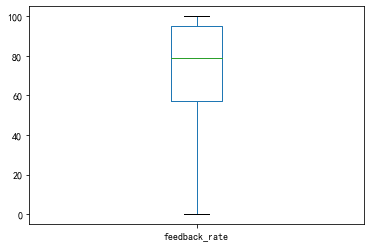

In [5]:
# 统计数据的数据要把偏离主体较远的数据清理掉
df.describe() # describe 方法，可以查看数据的整体情况 (std:方差)

# 分数: 通过箱线图对分数的无效值处理
df["feedback_rate"].plot(kind="box")

##### 4.4.3 重复值处理
* 使用duplicate检查重复值。可配合keep参数进行调整。
* 使用drop_duplicates删除重复值。

In [6]:
# 判断
df.duplicated() # 通过duplicated 方法查看哪些行是重复值
# 去重
df = df.drop_duplicates() # drop_duplicates 方法去重

# 此时数据已经基本很干净了
df

,game_name,box_txt,game_tag,game_fever,game_fav,game_nag,feedback_rate,game_avg,detail_url,game_intro
0,饥饿鲨：世界,开发：Ubisoft | 网络：单机 | 类型：休闲益智,3D,20.6w,5389.0,697.0,89.0,8.1,https://shouyou.gamersky.com/ku/1181165.shtml,【安卓版注意事项】 游戏需要Google Play支持。【游戏介绍】 《饥饿鲨：世界》是...
1,精灵宝可梦：GO,开发：NianticLabs | 网络：网游 | 类型：冒险,3D二次元,22.9w,6893.0,3451.0,67.0,6.4,https://shouyou.gamersky.com/ku/728405.shtml,【安卓版注意事项】 游戏需要Google Play账号，Google Play市场、G...
2,地下城与勇士：魂,开发：NEXON Company | 网络：网游 | 类型：动作,3D横版卷轴,0,978.0,536.0,65.0,5.2,https://shouyou.gamersky.com/ku/728405.shtml,《地下城与勇士：魂》是由NEXON Company出品的一款动作游戏。在游戏中，玩家...
3,闪耀暖暖,开发：叠纸游戏 | 网络：网游 | 类型：养成,美少女国产3D高画质,8.3w,1235.0,151.0,89.0,7.8,https://shouyou.gamersky.com/ku/728405.shtml,暖暖系列首款次世代3D巨作，以最高技术标准呈现数千种不同的材质，打造无限风格的至美服装盛...
4,命运-冠位指定,开发：TYPE-MOON | 网络：网游 | 类型：角色扮演,3D二次元,8.6w,10506.0,2075.0,84.0,8.2,https://shouyou.gamersky.com/ku/728405.shtml,《命运-冠位指定》是一款由TYPE-MOON开发的角色扮演游戏。本作根据《命运之夜》改编...
...,...,...,...,...,...,...,...,...,...,...
2627,OVERLORD：追思弥撒,开发：Kadokawa Games | 网络：网游 | 类型：角色扮演,二次元,0,87.0,2.0,98.0,8.7,https://shouyou.gamersky.com/ku/863263.shtml,《OVERLORD：追思弥撒》是由Kadokawa Games出品的一款角色扮演游戏，改...
2628,风云岛行动,开发：网易游戏 | 网络：网游 | 类型：冒险,生存高画质科幻国产,528,39.0,79.0,33.0,2.8,https://shouyou.gamersky.com/ku/863263.shtml,3名全新英雄陆续上线，隐身、瞬移、遁地、奶人……无所不能！新玩法周期事件、房间约战、新鲜...
2629,小林正雪2：抉择之惑,开发：Genuine Studio | 网络：单机 | 类型：解谜,NaN,0,8.0,0.0,100.0,9.5,https://shouyou.gamersky.com/ku/863263.shtml,《小林正雪2：抉择之惑》是由香港手机游戏开发团队Genuine Studio所推出的一款...
2630,每天早上，田中都会来迎接你,开发：torino Inc. | 网络：单机 | 类型：益智解谜,NaN,0,1.0,0.0,100.0,0.0,https://shouyou.gamersky.com/ku/863263.shtml,击退每天早上来迎接你的田中吧！ 不知道为什么，每天早上田中都会来迎接玩家，所以玩家要利...


##### 4.4.4 其他数据预处理
* 切分box_txt字段数据

In [7]:
# 由于box_txt字段是三条信息混在一起，所以要进行分列，并生成三列新的字段
'''
在原表后面追加三列新的字段如下：
dev       net      type
Ubisoft   单机     休闲益智
'''
# df["dev"],df["net"],df["type"] = df["box_txt"].str.split("|").str

# 删除原有的box_txt字段
del df["box_txt"]

In [8]:
df

,game_name,game_tag,game_fever,game_fav,game_nag,feedback_rate,game_avg,detail_url,game_intro
0,饥饿鲨：世界,3D,20.6w,5389.0,697.0,89.0,8.1,https://shouyou.gamersky.com/ku/1181165.shtml,【安卓版注意事项】 游戏需要Google Play支持。【游戏介绍】 《饥饿鲨：世界》是...
1,精灵宝可梦：GO,3D二次元,22.9w,6893.0,3451.0,67.0,6.4,https://shouyou.gamersky.com/ku/728405.shtml,【安卓版注意事项】 游戏需要Google Play账号，Google Play市场、G...
2,地下城与勇士：魂,3D横版卷轴,0,978.0,536.0,65.0,5.2,https://shouyou.gamersky.com/ku/728405.shtml,《地下城与勇士：魂》是由NEXON Company出品的一款动作游戏。在游戏中，玩家...
3,闪耀暖暖,美少女国产3D高画质,8.3w,1235.0,151.0,89.0,7.8,https://shouyou.gamersky.com/ku/728405.shtml,暖暖系列首款次世代3D巨作，以最高技术标准呈现数千种不同的材质，打造无限风格的至美服装盛...
4,命运-冠位指定,3D二次元,8.6w,10506.0,2075.0,84.0,8.2,https://shouyou.gamersky.com/ku/728405.shtml,《命运-冠位指定》是一款由TYPE-MOON开发的角色扮演游戏。本作根据《命运之夜》改编...
...,...,...,...,...,...,...,...,...,...
2627,OVERLORD：追思弥撒,二次元,0,87.0,2.0,98.0,8.7,https://shouyou.gamersky.com/ku/863263.shtml,《OVERLORD：追思弥撒》是由Kadokawa Games出品的一款角色扮演游戏，改...
2628,风云岛行动,生存高画质科幻国产,528,39.0,79.0,33.0,2.8,https://shouyou.gamersky.com/ku/863263.shtml,3名全新英雄陆续上线，隐身、瞬移、遁地、奶人……无所不能！新玩法周期事件、房间约战、新鲜...
2629,小林正雪2：抉择之惑,NaN,0,8.0,0.0,100.0,9.5,https://shouyou.gamersky.com/ku/863263.shtml,《小林正雪2：抉择之惑》是由香港手机游戏开发团队Genuine Studio所推出的一款...
2630,每天早上，田中都会来迎接你,NaN,0,1.0,0.0,100.0,0.0,https://shouyou.gamersky.com/ku/863263.shtml,击退每天早上来迎接你的田中吧！ 不知道为什么，每天早上田中都会来迎接玩家，所以玩家要利...


In [9]:
# extract 提取函数，通过正则表达式把需要的字符串提取出来
df["dev"] = df["dev"].str.extract("：([\u4e00-\u9fa5]+|[a-zA-Z]+)")   #\u4e00-\u9fa5 中文    [a-zA-Z]+ 英文
df["net"] = df["net"].str.extract("：([\u4e00-\u9fa5]+|[a-zA-Z]+)")
df["type"] = df["type"].str.extract("：([\u4e00-\u9fa5]+|[a-zA-Z]+)")

KeyError: 'dev'

* 热度转换为整数值

In [ ]:
# 如果为了防止多次操作导致把表改坏，可以通过copy函数赋值给新的表名
t = df.copy()
# nan处理不了,先把nan数据清理
t = t[t["game_fever"]!=0 & t["game_fever"].notnull()] # & 交集
# 把W替换掉，*10000
t["game_fever"] = t["game_fever"][t["game_fever"].str.contains("w")].replace("w","",regex=True).astype(np.float64)*10000   #regex=True一定要加上，表示允许使用正则表达式

### 5.分析案例

#### 5.1 游戏热度与评分关联性的分析

In [ ]:
t1 = t.copy() # 重新复制一张表t1
x = t1["game_fever"]   # 热度
y = t1["feedback_rate"] # 评分
plt.scatter(x,y) # 绘制散点图

# 发现热度和评分没有明显的联系，热度高的游戏评分不一定高

#### 5.2 热门游戏分数所处的区间

In [ ]:
t1 = t.copy()
plt.hist(t1["game_avg"],[0,1,2,3,4,5,6,7,8,9,10]) # 绘制直方图，可以根据自己的需求分层

#### 5.3 热门游戏的名称分词分析

In [ ]:
# cut 函数可以用来切词，默认的是精准模式
# 光标移动到方法上面，按shift+tab，弹出文档，连续按选择文档详细程度
result = jieba.cut("这是数据分析的课程")  # result不能直接输出，结果是一个生成器，通过join解析
print(",".join(result)) # 这是，的，这种数据是我们不需要的数据，可以放在停用词表中

In [ ]:
t1 = t.copy()
# 1.获取所有的游戏的名称(只要中文名字)
texts = "".join(df["game_name"].values.tolist()) # 用.values把表转成一列值，.tolist转化为列表，然后拼接成一个字符串
# 获取中文
texts = "".join(re.findall(r'[\u4e00-\u9fa5]',texts)) # 对texts正则
# 切分
result = jieba.cut(texts)

# 2.导入停用词表的数据(忽略此数据)
stopwords = open("停用词表.txt",encoding="utf-8").read()
stopwords = stopwords.split("\n")  # 去掉换行符

# 3.过滤分词的结果
allwords = [word for word in result if len(word) > 1 and word not in stopwords]  #取到词的长度大于1并且词不在停用词表中的

# 4.创建dataframe对象,并统计单词及其次数
res = pd.DataFrame(allwords,columns=["word"])  # 把allowords封装，赋列名
res = res["word"].groupby(res["word"]).count() # 对词的出现频率进行统计 groupby函数

# 列设置名称
res.index.name="txt" # 给列设置名称
res = res.reset_index() # 把索引进行重置

# 5.给索引列赋值,并过滤出超过3的单词
res = res[res["word"] > 3].reset_index(drop=True) # 只保留大于3的值，其余清理掉

# 6.标题词云展示数据
name = res["txt"].tolist()
value = res["word"].tolist()

wc = WordCloud(width=1366,height=600)
wc.add("",name,value,word_size_range=[20,100],shape='circle')
wc.render("游戏分析.html")

#### 5.4 热度排名前十的成绩分布

In [ ]:
# 排名前十的游戏及其分数
t = df.copy()
top10 = t.head(10)

x = top10["game_name"]
y = top10["game_avg"]

figure, ax = plt.subplots(1, 1)
ax.set_xticklabels(t["game_name"],rotation=90)
ax.bar(x, height=y, width=0.5, label="游戏评分", tick_label=x)

# 添加数据标签
for a, b in zip(x, y):
    ax.text(a, b + 0.05, '%.1f' % b, ha='center', va='bottom', fontsize=10)

# 添加图例
plt.legend(loc=(1, 1))

# 展示图形
plt.show()